<a href="https://colab.research.google.com/github/Lunarros/Lunarros/blob/main/Mathematical_Statistics_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

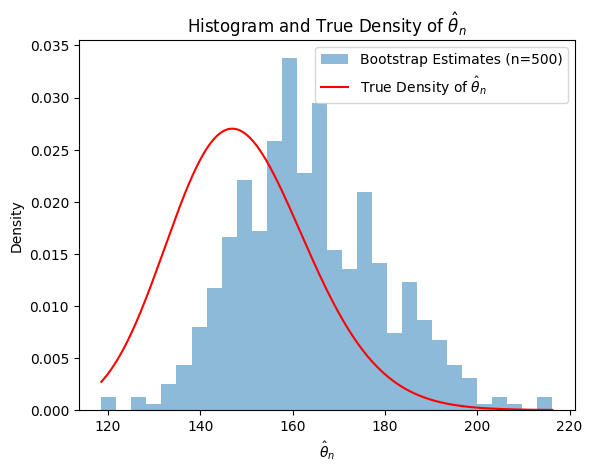

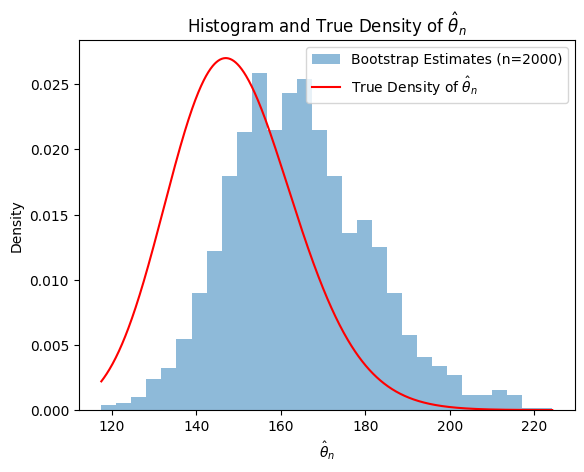

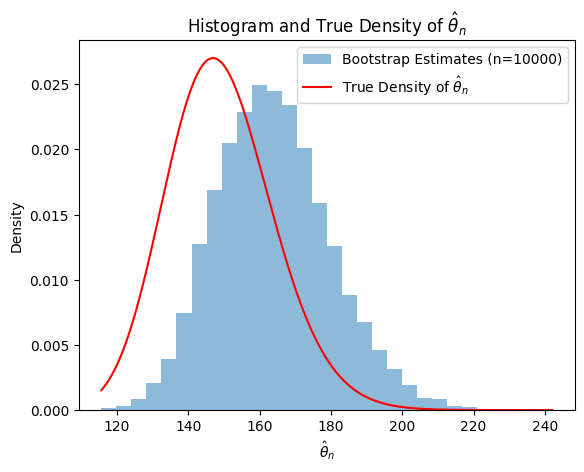

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Generate original data
mu = 5  # Mean
n = 100  # Number of observations
data = np.random.normal(mu, 1, n)  # i.i.d. observations from N(mu, 1)

# Function to plot histogram and true density
def plot_histogram_and_true_density(data, num_replicas, mu, n):
    # Bootstrap process
    bootstrap_estimates = []
    for _ in range(num_replicas):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_theta = np.exp(bootstrap_mean)
        bootstrap_estimates.append(bootstrap_theta)

    # Plot histogram of bootstrap estimates
    plt.hist(bootstrap_estimates, bins=30, density=True, alpha=0.5, label=f'Bootstrap Estimates (n={num_replicas})')

    # True density for theta_hat (log-normal)
    sigma = np.sqrt(1 / n)  # Standard deviation for the log of X
    s = sigma  # Scale parameter for lognorm is std of log(X)
    x = np.linspace(min(bootstrap_estimates), max(bootstrap_estimates), 1000)
    pdf = lognorm.pdf(x, s, scale=np.exp(mu))
    plt.plot(x, pdf, 'r-', label='True Density of $\\hat{\\theta}_n$')

    # Plotting details
    plt.xlabel('$\\hat{\\theta}_n$')
    plt.ylabel('Density')
    plt.title('Histogram and True Density of $\\hat{\\theta}_n$')
    plt.legend()
    plt.show()

# Numbers of bootstrap samples to compare
num_replicas_list = [500, 2000, 10000]

# Generate plots for each number of replicas
for num_replicas in num_replicas_list:
    plot_histogram_and_true_density(data, num_replicas, mu, n)


Bootstrap with 500 replicas: SE = 10.238942202056263, 95% CI = (102.9379662025453, 144.61607308581338)


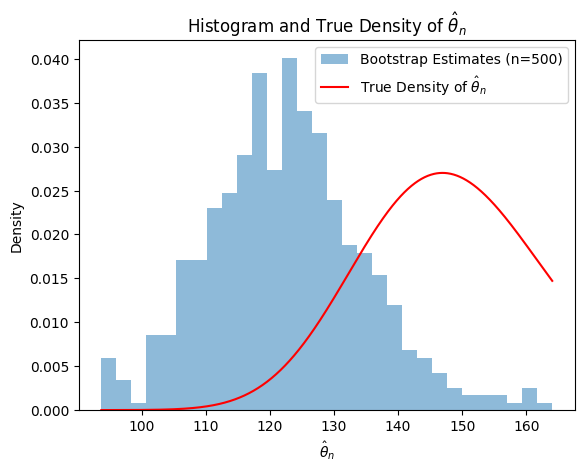

Bootstrap with 2000 replicas: SE = 11.530544560632018, 95% CI = (100.63677135192341, 144.49315534018848)


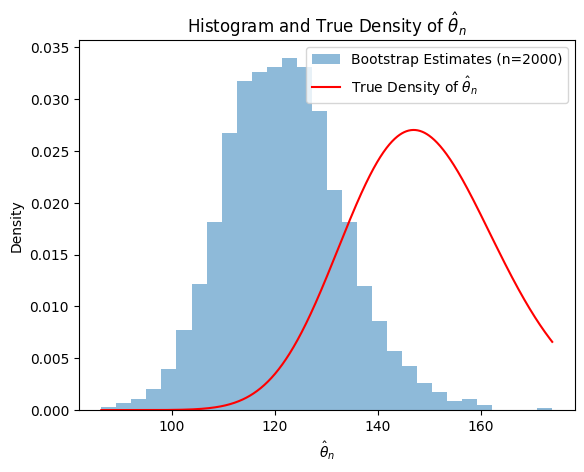

Bootstrap with 10000 replicas: SE = 11.537748085098512, 95% CI = (100.73302042356211, 145.76118616437088)


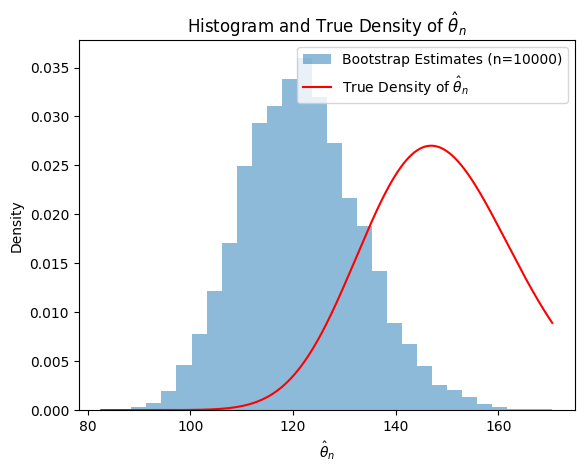

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Generate original data
mu = 5  # Mean of the normal distribution
n = 100  # Number of observations
data = np.random.normal(mu, 1, n)  # i.i.d observations from N(mu, 1)

# Function to perform bootstrap and compute SE and CI
def bootstrap_SE_CI(data, num_replicas):
    bootstrap_estimates = []
    for _ in range(num_replicas):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_theta = np.exp(bootstrap_mean)
        bootstrap_estimates.append(bootstrap_theta)

    se = np.std(bootstrap_estimates, ddof=1)
    ci_lower = np.percentile(bootstrap_estimates, 2.5)
    ci_upper = np.percentile(bootstrap_estimates, 97.5)
    return se, (ci_lower, ci_upper)

# Function to plot histogram and true density
def plot_histogram_and_true_density(data, num_replicas, mu, n):
    bootstrap_estimates = []
    for _ in range(num_replicas):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_theta = np.exp(bootstrap_mean)
        bootstrap_estimates.append(bootstrap_theta)

    plt.hist(bootstrap_estimates, bins=30, density=True, alpha=0.5, label=f'Bootstrap Estimates (n={num_replicas})')
    sigma = np.sqrt(1 / n)
    x = np.linspace(min(bootstrap_estimates), max(bootstrap_estimates), 1000)
    pdf = lognorm.pdf(x, sigma, scale=np.exp(mu))
    plt.plot(x, pdf, 'r-', label='True Density of $\\hat{\\theta}_n$')
    plt.xlabel('$\\hat{\\theta}_n$')
    plt.ylabel('Density')
    plt.title('Histogram and True Density of $\\hat{\\theta}_n$')
    plt.legend()
    plt.show()

# Perform bootstrap and plot results
num_replicas_list = [500, 2000, 10000]
for num_replicas in num_replicas_list:
    se, ci = bootstrap_SE_CI(data, num_replicas)
    print(f'Bootstrap with {num_replicas} replicas: SE = {se}, 95% CI = {ci}')
    plot_histogram_and_true_density(data, num_replicas, mu, n)
